 data: https://www.kaggle.com/datasets/carlolepelaars/camvid
 
 data loader: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
 
 
 someone elses data loader using camvid: https://github.com/UsamaI000/CamVid-Segmentation-Pytorch/blob/master/U-Net/src/Camvid.py & https://github.com/UsamaI000/CamVid-Segmentation-Pytorch/blob/master/U-Net/train.py

In [1]:
import os
from PIL import Image

import torch
from torchvision import transforms

In [7]:
class CamVidDataSet():
    def __init__(self, imgs_path, labels_path, transform):
        self.imgs_path = imgs_path
        self.labels_path = labels_path
        self.transform = transform
        
        self.imgs = os.listdir(self.imgs_path)
        self.labels = list(map(lambda x: x[:-4] + '_L.png', self.imgs)) #see train_labels
        
    def __len__(self):
        return len(self.imgs)
        
    def __getitem__(self, idx):
        img_loc = os.path.join(self.imgs_path, self.imgs[idx])
        image = Image.open(img_loc).convert("RGB")
        image_out = self.transform(image)
        
        label_loc = os.path.join(self.labels_path, self.labels[idx])
        label = Image.open(label_loc).convert("RGB")
        label_out = self.transform(label)
        
        image_tensor = transforms.Compose([transforms.ToTensor()])(image_out) 
        label_tensor = transforms.Compose([transforms.PILToTensor()])(label_out)
        
        return image_out, label_out

In [8]:
input_size = (128, 128)
transformation = transforms.Compose([transforms.Resize(input_size, 0)])
camvid = CamVidDataSet("./archive/CamVid/train/", "./archive/CamVid/train_labels/", transformation)

In [14]:
type(camvid[40][0])

PIL.Image.Image

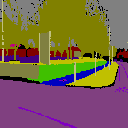

In [16]:
camvid[40][1]

In [120]:
batch = 64
trainloader = torch.utils.data.DataLoader(camvid, batch_size=batch, shuffle=True)

In [121]:
for i, data in enumerate(trainloader):
    img, label = data
    print(img, label)

tensor([[[[0.3961, 0.4039, 0.3961,  ..., 0.2902, 0.3804, 0.4078],
          [0.3922, 0.3961, 0.3961,  ..., 0.6039, 0.1961, 0.5961],
          [0.4000, 0.4039, 0.4039,  ..., 0.2667, 0.4431, 0.4510],
          ...,
          [0.1686, 0.1490, 0.1059,  ..., 0.1686, 0.1569, 0.1333],
          [0.1412, 0.1686, 0.1686,  ..., 0.1412, 0.1294, 0.1333],
          [0.1961, 0.1529, 0.1725,  ..., 0.1490, 0.1373, 0.1490]],

         [[0.3961, 0.4000, 0.3961,  ..., 0.2471, 0.3608, 0.3882],
          [0.3922, 0.3961, 0.3961,  ..., 0.5725, 0.1843, 0.5647],
          [0.4000, 0.4039, 0.4039,  ..., 0.2353, 0.4314, 0.4118],
          ...,
          [0.1647, 0.1490, 0.1059,  ..., 0.1686, 0.1765, 0.1529],
          [0.1451, 0.1686, 0.1725,  ..., 0.1529, 0.1490, 0.1529],
          [0.1961, 0.1529, 0.1686,  ..., 0.1608, 0.1529, 0.1608]],

         [[0.3804, 0.3922, 0.3882,  ..., 0.2000, 0.3333, 0.2980],
          [0.3843, 0.3882, 0.3804,  ..., 0.5490, 0.1608, 0.4902],
          [0.4000, 0.4039, 0.3961,  ..., 0

tensor([[[[0.9137, 0.9176, 0.9333,  ..., 0.9451, 0.9529, 0.9529],
          [0.9137, 0.9255, 0.9333,  ..., 0.9569, 0.9569, 0.9569],
          [0.9137, 0.9216, 0.9255,  ..., 0.9529, 0.9529, 0.9608],
          ...,
          [0.4157, 0.4392, 0.4118,  ..., 0.3765, 0.3529, 0.3647],
          [0.4627, 0.4275, 0.4196,  ..., 0.3373, 0.3098, 0.3843],
          [0.4392, 0.4157, 0.4353,  ..., 0.3216, 0.3333, 0.3529]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.4118, 0.4353, 0.4118,  ..., 0.3804, 0.3686, 0.3804],
          [0.4627, 0.4275, 0.4196,  ..., 0.3529, 0.3255, 0.4000],
          [0.4353, 0.4118, 0.4353,  ..., 0.3255, 0.3490, 0.3686]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1

tensor([[[[0.3922, 0.3686, 0.4000,  ..., 0.3451, 0.3765, 0.2706],
          [0.3686, 0.3804, 0.3725,  ..., 0.1412, 0.2314, 0.4118],
          [0.3804, 0.3765, 0.3843,  ..., 0.2353, 0.2275, 0.1804],
          ...,
          [0.1412, 0.1333, 0.1373,  ..., 0.1804, 0.1608, 0.1569],
          [0.1333, 0.1451, 0.1451,  ..., 0.1804, 0.1686, 0.1451],
          [0.1490, 0.1373, 0.1098,  ..., 0.1725, 0.1647, 0.1765]],

         [[0.3922, 0.3686, 0.3961,  ..., 0.3098, 0.3451, 0.2588],
          [0.3686, 0.3843, 0.3725,  ..., 0.1216, 0.1961, 0.4039],
          [0.3804, 0.3804, 0.3843,  ..., 0.2235, 0.2157, 0.1765],
          ...,
          [0.1412, 0.1333, 0.1412,  ..., 0.2039, 0.1725, 0.1686],
          [0.1333, 0.1451, 0.1490,  ..., 0.2039, 0.1882, 0.1647],
          [0.1490, 0.1412, 0.1137,  ..., 0.1843, 0.1843, 0.1765]],

         [[0.3922, 0.3686, 0.3961,  ..., 0.2235, 0.3216, 0.2275],
          [0.3686, 0.3843, 0.3725,  ..., 0.0941, 0.1922, 0.3451],
          [0.3725, 0.3804, 0.3843,  ..., 0

KeyboardInterrupt: 